# INSAID Hiring Exercise

## Important: Kindly go through the instructions mentioned below.

- The Sheet is structured in **4 steps**:
    1. Understanding data and manipulation
    2. Data visualization
    3. Implementing Machine Learning models(Note: It should be more than 1 algorithm)
    4. Model Evaluation and concluding with the best of the model.
    
    
    

- Try to break the codes in the **simplest form** and use number of code block with **proper comments** to them
- We are providing **h** different dataset to choose from(Note: You need to select any one of the dataset from this sample sheet only)
- The **interview calls** will be made solely based on how good you apply the **concepts**.
- Good Luck! Happy Coding!

### Importing the data

In [208]:
import pandas as pd
import numpy as np

#reading csv file
df=pd.read_csv('C:/Users/HP/Documents/Churn.csv',header=0,index_col=None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Understanding the data

Let's check out the shape and see if there's any missing values in the dataset

In [209]:
print("The shape is:")
df.shape

The shape is:


(7043, 21)

In [210]:
print("Let us check if there is any missing value: ")
df.count()

Let us check if there is any missing value: 


customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

Great, No missing values

In [211]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Looking at the dataset, we can clearly see that there are mostly features having categorical dataset and only a few continous features

We will go feature by feature, look at it, visualize it and try to get some insights from it
We obviosuly cannot do this with all the features, so I will hand pick some of them and then do some opoerations and find the 
important features and work with them

### Let us begin:

Before anything else let us change the values of Churn from No and Yes to 0 and 1
For this purpose we will use LabelEncoder

In [212]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

In [213]:
df['Churn']= label_encoder.fit_transform(df['Churn'])  
df['Churn'].unique()

array([0, 1], dtype=int64)

### Feature 1: CustomerID

In [214]:
df['customerID'].value_counts().count()

7043

Hence, every single column has a different value
The reason why we will delete it are as follows-
1. This will be of no use while we predict our churn rate
2. Since the data has a great amount of randomness or every data is unique, so when we use algorithms like decision      tree(especially ID3) then this will give us a very poor accuracy as every time a new node will pop out out of this feature which
is meaningless

In [215]:
df=df.drop(['customerID'], axis = 1)

### Feature 2: Gender

This feature contains two categorical values, Male and Female
Let us see their amount.

In [216]:
import seaborn as sns
import matplotlib.pyplot as plt

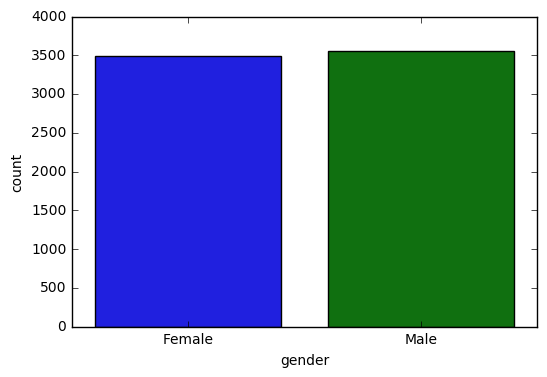

In [217]:
%matplotlib inline
sns.countplot(df.gender,label='count')

Almost the same, we will see if that is good for our prediction model or not in the future
Now we will just change names to some number. Since there are only two numbers, we will not give label encoder a headache.

In [218]:
df['gender']= label_encoder.fit_transform(df['gender'])  
df['gender'].unique()

array([0, 1], dtype=int64)

 0 : Female  1 : Male


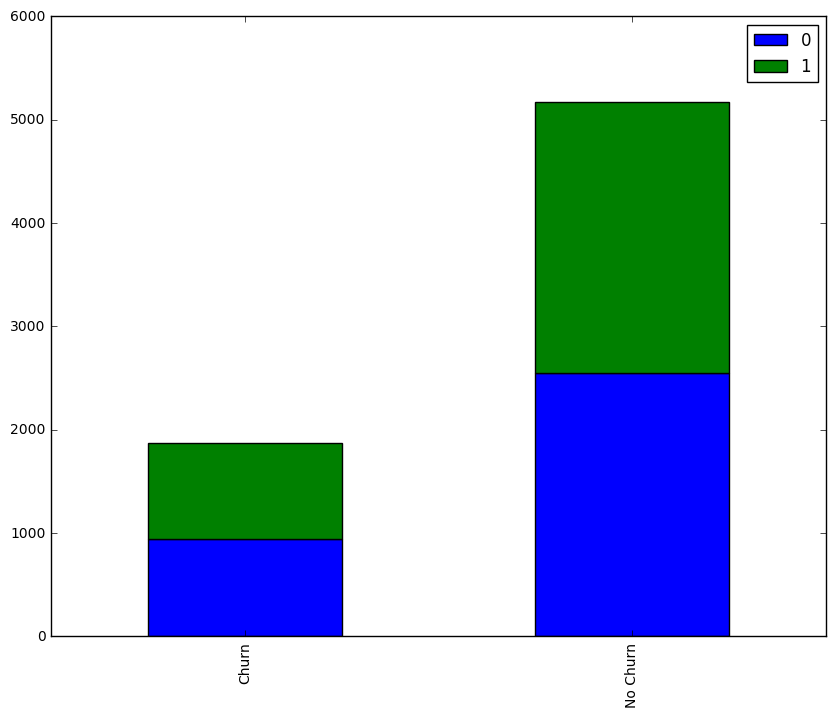

In [219]:
churn_sex = df[df['Churn']==1]['gender'].value_counts()
nochurn_sex = df[df['Churn']==0]['gender'].value_counts()
ti = pd.DataFrame([churn_sex,nochurn_sex])
ti.index = ['Churn','No Churn']
ti.plot(kind='bar',stacked=True, figsize=(10,8))
print(" 0 : Female", " 1 : Male")

There seems to be no distiction based on gender when it comes to the churn. So, as far as I am concerned it is not affecting the
dataset

### Feature 3: SeniorCitizen

We will do similar operations with this feature too.

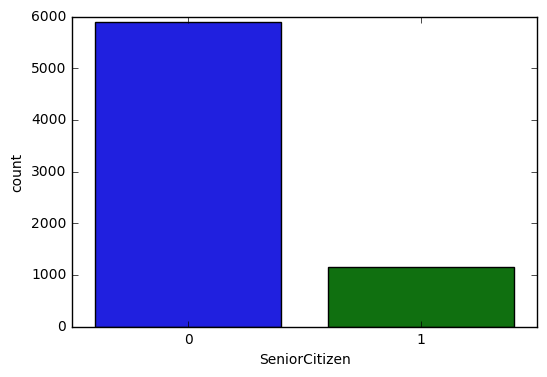

In [220]:
%matplotlib inline
sns.countplot(df.SeniorCitizen,label='count')

 0 : Not a Senior Citizen  1 : Senior Citizen


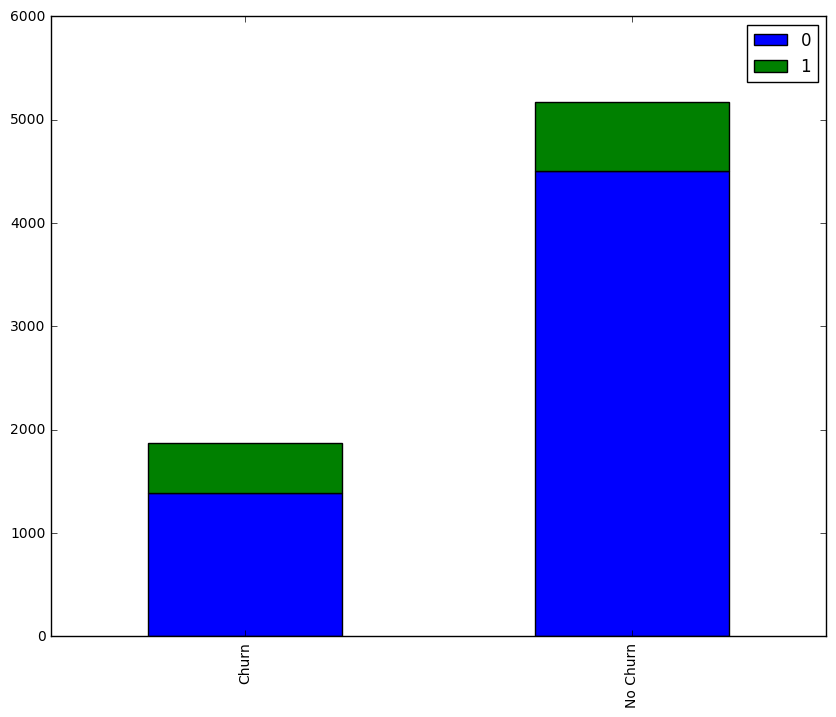

In [221]:
churn_sex = df[df['Churn']==1]['SeniorCitizen'].value_counts()
nochurn_sex = df[df['Churn']==0]['SeniorCitizen'].value_counts()
ti = pd.DataFrame([churn_sex,nochurn_sex])
ti.index = ['Churn','No Churn']
ti.plot(kind='bar',stacked=True, figsize=(10,8))
print(" 0 : Not a Senior Citizen", " 1 : Senior Citizen")

### Feature 3: Partner

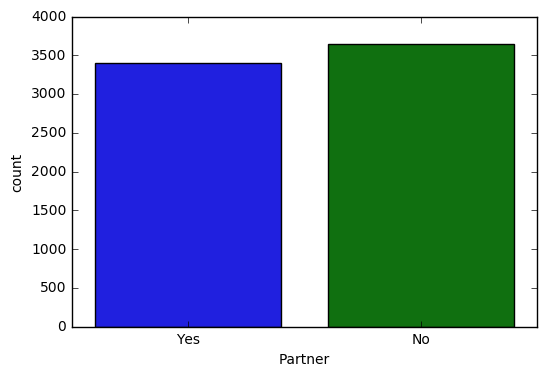

In [222]:
%matplotlib inline
sns.countplot(df.Partner,label='count')

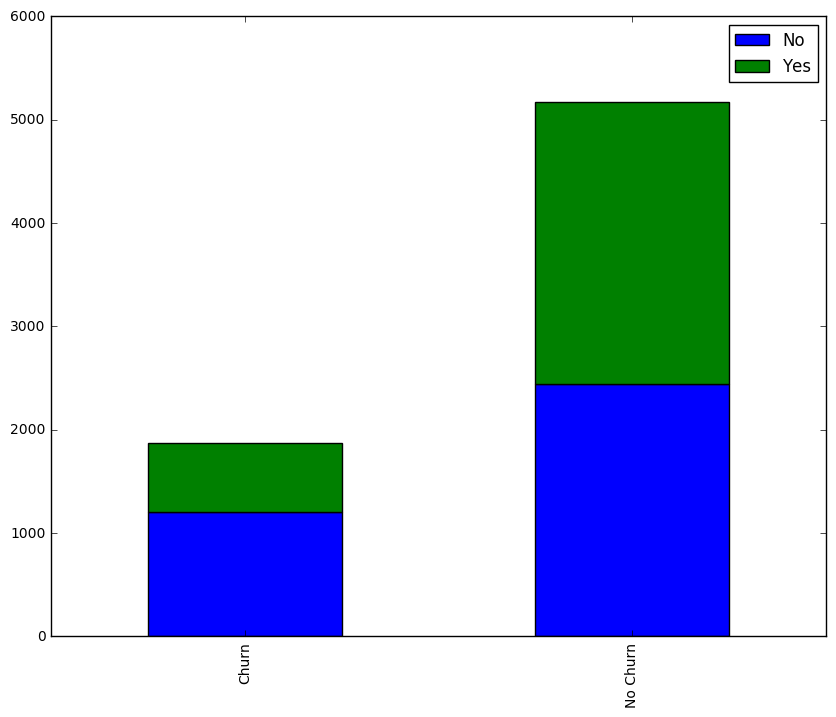

In [223]:
churn_sex = df[df['Churn']==1]['Partner'].value_counts()
nochurn_sex = df[df['Churn']==0]['Partner'].value_counts()
ti = pd.DataFrame([churn_sex,nochurn_sex])
ti.index = ['Churn','No Churn']
ti.plot(kind='bar',stacked=True, figsize=(10,8))

In [224]:
df['Partner']= label_encoder.fit_transform(df['Partner'])  
df['Partner'].unique()

array([1, 0], dtype=int64)

### Feature 4: Dependents

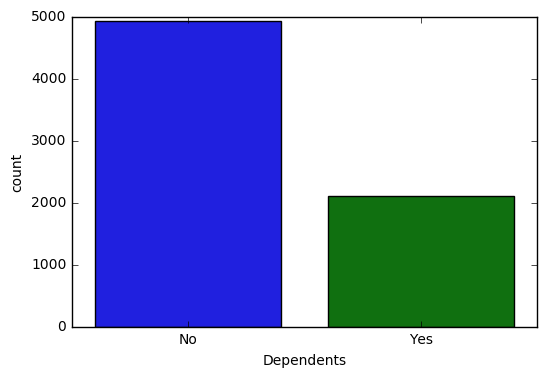

In [225]:
%matplotlib inline
sns.countplot(df.Dependents,label='count')

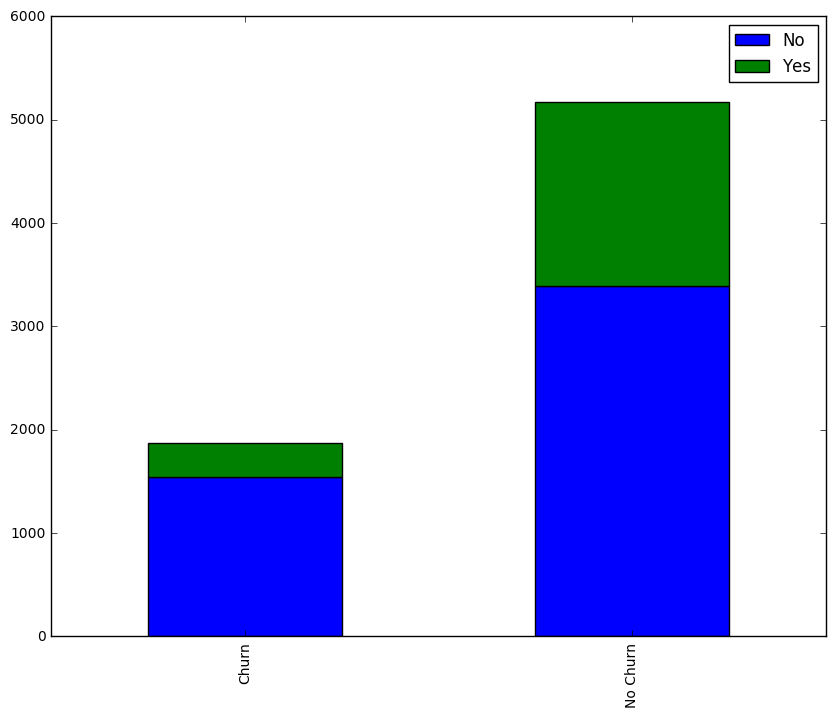

In [226]:
churn_sex = df[df['Churn']==1]['Dependents'].value_counts()
nochurn_sex = df[df['Churn']==0]['Dependents'].value_counts()
ti = pd.DataFrame([churn_sex,nochurn_sex])
ti.index = ['Churn','No Churn']
ti.plot(kind='bar',stacked=True, figsize=(10,8))

In [227]:
df['Dependents']= label_encoder.fit_transform(df['Dependents'])  
df['Dependents'].unique()

array([0, 1], dtype=int64)

## Feature 5 : Tenure

In [228]:
df['tenure'].value_counts().count()

73

Right now, there is not much we can do about it, so we leave it as it is

### Let us change all the categorical values
Feature: 
-PhoneService
-OnlineSecurity
-OnlineBackup
-DeviceProtection
-TechSuppoprt etc

In [229]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [230]:
#Let us check some of the categories-
print(df['MultipleLines'].value_counts(),
df['InternetService'].value_counts(),
df['OnlineSecurity'].value_counts()),
df['OnlineBackup'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

### We will again use label encoder to do this task.

In [231]:
df['PhoneService']= label_encoder.fit_transform(df['PhoneService'])  
df['PhoneService'].unique()
df['MultipleLines']= label_encoder.fit_transform(df['MultipleLines'])  
df['MultipleLines'].unique()
df['InternetService']= label_encoder.fit_transform(df['InternetService'])  
df['InternetService'].unique()
df['OnlineSecurity']= label_encoder.fit_transform(df['OnlineSecurity'])  
df['OnlineSecurity'].unique()
df['OnlineBackup']= label_encoder.fit_transform(df['OnlineBackup'])  
df['OnlineBackup'].unique()
df['DeviceProtection']= label_encoder.fit_transform(df['DeviceProtection'])  
df['DeviceProtection'].unique()
df['TechSupport']= label_encoder.fit_transform(df['TechSupport'])  
df['TechSupport'].unique()
df['StreamingTV']= label_encoder.fit_transform(df['StreamingTV'])  
df['StreamingTV'].unique()
df['StreamingMovies']= label_encoder.fit_transform(df['StreamingMovies'])  
df['StreamingMovies'].unique()
df['Contract']= label_encoder.fit_transform(df['Contract'])  
df['Contract'].unique()
df['PaperlessBilling']= label_encoder.fit_transform(df['PaperlessBilling'])  
df['PaperlessBilling'].unique()
df['PaymentMethod']= label_encoder.fit_transform(df['PaymentMethod'])  
df['PaymentMethod'].unique()

array([2, 3, 0, 1], dtype=int64)

In [232]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

Clearly, TotalCharges is of object type and this cannot be processed so we have to change it

In [233]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [234]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [235]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2266.771362,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,NaN,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,NaN,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,NaN,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


### We see some NaN values related to TotalCharges
We have to fix it.

In [236]:
df['TotalCharges'] = df['TotalCharges'].fillna(df.TotalCharges.mean())

Now, let us finally divide the calssification feature or the feature that has to be predicted.

In [237]:
y = df.Churn
x=df.drop(['Churn'], axis = 1)

### I have come across one observation. Let me see how far I am right.
So, tenure times MonthlyCharges gives TotalCharges

In [238]:
x['TotalCharges1']  = x['tenure']*x['MonthlyCharges']

In [239]:
abs(x['TotalCharges1']-x['TotalCharges']).head()

0     0.00
1    46.80
2     0.45
3    62.75
4    10.25
dtype: float64

These values are very close and we can drop tenure and MonthlyCharges

Let us use minmax Scaler, it is observed that scaling improves the acuuracy and we will do it.

In [240]:
x['TotalCharges'] = ((x['TotalCharges'] -x['TotalCharges'].min())*(4-0)/(x['TotalCharges'].max() - x['TotalCharges'].min()))

In [242]:
x=x.drop(['TotalCharges1','tenure', 'MonthlyCharges'], axis = 1)

### Implement Machine Learning Models

Without doing any feature engineering, let us see how good we did.

### Random Forest

In [243]:
from sklearn.cross_validation import train_test_split as tts, cross_val_score as cvs
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import accuracy_score

In [244]:
x_train, x_test, y_train, y_test =tts(x, y, test_size=0.43, random_state=42)
clf_rf=rfc(random_state=43)
clr_rf = clf_rf.fit(x_train,y_train)
clf_rf.score(x_test,y_test)

0.7801254539451964

### GradientBoostingClassifier

In [245]:
from sklearn.ensemble import GradientBoostingClassifier as gbc
clf_gb=gbc(n_estimators=54,random_state=1)
clf_gb=clf_gb.fit(x_train,y_train)
clf_gb.score(x_test,y_test)

0.8068669527896996

### LogisticRegression

In [246]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg=LogisticRegression()
logreg.fit(x_train, y_train)
logreg.predict(x_test)
logreg.score(x_test, y_test)

0.7857378672829317

GradientBoosting is giving us the maximum result. So, we will use that in the future after some feature engineering.

Not so bad actually, without any sort of feature engineering we have got good accuracy.

Sometimes it is possible that the amout of responses we are looking at are unequal in number. It is clearly stated in question
that we cannot do much with it. So, I am going to leave it as it is but let us just see.

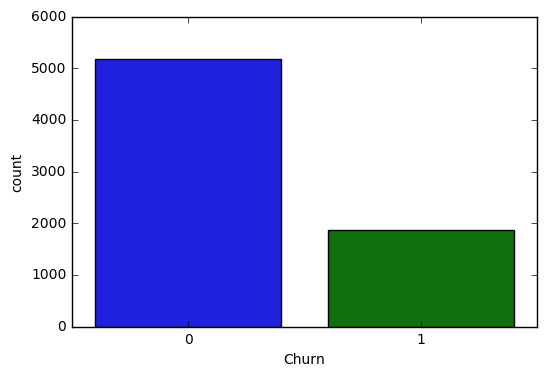

In [247]:
sns.countplot(df['Churn'],label='count')

Let us try to increase our accuracy by deleting the unrelevent features. 

### Feature Extration

### Chi2 test via select K best

Since the features are categorical in nature,
we will use the chi2 test to determine the features we should keep.

In [248]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

In [249]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [1.03964867e+00 7.55484308e+01 4.34568352e+01 8.55346001e+01
 7.95003571e-02 3.31169196e+00 5.09076428e+00 2.89794251e+02
 1.24936441e+02 8.62608071e+01 2.75651840e+02 7.80854693e+00
 2.96963817e+00 6.10317059e+02 6.15260672e+01 2.68987308e+01
 1.41916775e+02]
Feature list: Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],
      dtype='object')


### PCA

Feature ranking:
1. feature 16 (0.340876)
2. feature 13 (0.095857)
3. feature 15 (0.076186)
4. feature 6 (0.057627)
5. feature 7 (0.053631)
6. feature 0 (0.044899)
7. feature 10 (0.038941)
8. feature 5 (0.035827)
9. feature 14 (0.035514)
10. feature 8 (0.034027)
11. feature 2 (0.033791)
12. feature 12 (0.033480)
13. feature 9 (0.032931)
14. feature 11 (0.029708)
15. feature 1 (0.024176)
16. feature 3 (0.022449)
17. feature 4 (0.010081)


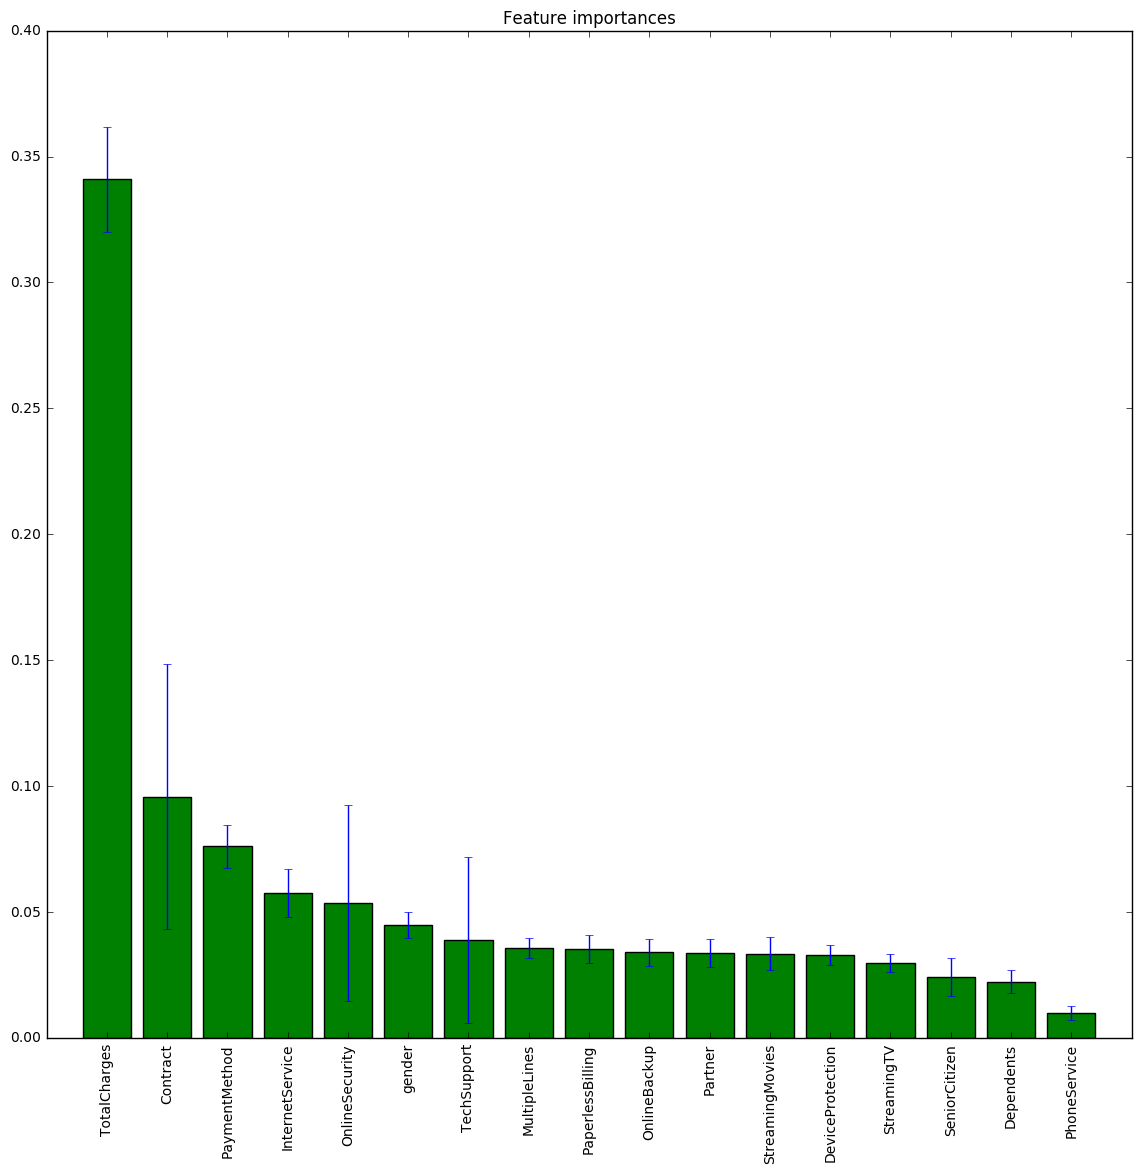

In [250]:
#applying pca
clf_rf_1 = rfc()      
clr_rf_1 = clf_rf_1.fit(x_train,y_train)
importances = clr_rf_1.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [251]:
x1=x

Let us see the effects of PCA.

In [253]:
x1=x1.drop(['SeniorCitizen','PhoneService','Dependents','StreamingTV','DeviceProtection','StreamingMovies',
            'Partner','OnlineBackup','PaperlessBilling','MultipleLines'], axis = 1)

In [256]:
x1=x1.drop(['TechSupport','gender'], axis = 1)

In [259]:
x1_train, x1_test, y1_train, y1_test =tts(x1, y, test_size=0.43, random_state=42)

In [266]:
from sklearn.ensemble import GradientBoostingClassifier as gbc
clf_gb=gbc(n_estimators=54,random_state=1)
clf_gb=clf_gb.fit(x1_train,y1_train)
clf_gb.score(x1_test,y1_test)

0.802244965335094

Let us see the cross validation accuracy

In [267]:
print(cvs(clf_gb,x,y,cv=10,scoring="accuracy",).mean())

0.8012197041921286


Okay, that is something, even after removing so many features, the accuracy has not been affected much.

### Confusion Matrix

In [193]:
Y_pred = clf_rf.predict(x_test)

In [263]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
print(cm)

[[2014  206]
 [ 472  337]]


The type 2 error is humungus and the only way to encounter it is by taking samples from both the Yes and No responses
somehow making them equal. We will lose most of our dataset but then the accuracy could increase.
The best way to do it is via sampling with replacement for less occuring response and sampling without replacement
for data with more response.

### Final Conclusions

### We will first see the methods that we used
### Then we will see the outcomes and how we can still do better 

* CustomerID was removed because it was irrelevant.

* We then saw the data and observed that most of the features are categorical.

* We observed the value counts of as much feature as possible and then saw their impact on Yes/No on Churn.

* Since the ML algorithms cannot work with strings, so we changed the strings to some categorical values via Label Encoder

* We found out that tenure times MonthlyCharge is very close to TotalCharge so we dropped the previous two.

* Later on we used ML Algorithms and saw our acuracy, we observed that GradientBoosting is giving us the maximum accuracy.
  We held on with it.

* We then removed some features and even after removing them, the accuracy only reduced by 1/10th of a percent.

### How did you select variables to be included in the model?
    I used two basic feature selection techniques.
    1. Chi2-  Since, most of the features were categorical therefore chi2 was the first thing that came to my mind 
       as I read it in my statistics class. 
    2. PCA-  It is the most famous feature selection technique which uses the concept of eigen values and eigen vectors,
       I read about it when I was reading Linear Algebra for data science.

### Demonstrate the performance of the model
 We used 3 basic algorithms for classification and theh best accuracy that we got was aroud 80%
 
    * We can increase this accuracy by a simple method of sampling, because of the time bound I had, I could't do it.
      Sampling is needed because after looking at the data we saw that:
        73% are 0.
        27% are 1
    This can hugely affect our accuracy
But then, we saw that even after removing a tremendous amout of features using PCA, our accuracyy didn't fall much.

### What are the key factors that predict customer churn? Do these factors make sense?

* According to chi2, the top 7 features that matters are--

  * OnlineSecurity
  * OnlineBackup
  * TechSupport
  * StreamingMovies
  * PaperlessBilling
  * TotalCharges

* According to PCA--

  * TotalCharges
  * Contract
  * PaymentMethod
  * InternetService
  * OnlineSecurity
  
  
To me the features extracted by PCA makes more sence because-
* Total Charges-- Customers would want to pay less
* PaymentMethod--  People generally prefer paying online and not going out of their roomsin the sun or rain etc
* InternetService-- In this era who would not want internet!
* OnlineSecurity-- Self Explanatory

 ### What offers should be made to which customers to encourage them to remain with company?
    
The features extrated from PCA should be considered.
* Total Charges-- Customers would want to pay less
* PaymentMethod--  People generally prefer paying online and not going out of their roomsin the sun or rain etc
* InternetService-- In this era who would not want internet!
* OnlineSecurity-- People would not want their private data to get stolen.

Apart from this I guess a good customer service would be preferred and contracts should be taken care of. The longer a customer 
stays, more perks should be provided.Plus some coupons if we make profit.

Also, it is very important to see where are customers are swithcing to and why/where do we lack with the thing our competitors have.

 ### Assuming these actions were implemented, how would you determine whether they had worked?
    We collect the dataset of a month or so and do the same process again as we did wih this dataset
    
    Also, we can find the profit or loss that we incurred before and after setting up this plan. If we make profit then
    carry on and if we don't then setting some other plans.

### Remarks
I would be happy to have any sort of discussion over the methods I used